In [65]:
import io
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import math
import matplotlib.pyplot as plt
df=pd.read_csv("https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv")

In [66]:
df.head(50)

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.50,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.00,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.20,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.00,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.00,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority,NaN
5,IND,India,AKRIMOTA LIG,IND0000003,250.00,23.7689,68.6447,Coal,Oil,NaN,...,WRI,NaN,2018.0,821.798000,1153.421000,1208.852000,1175.765000,1147.913000,Central Electricity Authority,NaN
6,IND,India,ALIYAR,IND0000004,60.00,10.4547,77.0078,Hydro,NaN,NaN,...,WRI,NaN,2018.0,147.568450,157.558250,152.195200,61.421350,89.629600,Central Electricity Authority,NaN
7,IND,India,ALLAIN DUHANGAN,IND0000005,192.00,32.2258,77.2070,Hydro,NaN,NaN,...,WRI,NaN,2018.0,696.738800,674.391100,721.335200,675.724400,679.594950,Central Electricity Authority,NaN
8,IND,India,ALMATTI DAM,IND0000006,290.00,16.3300,75.8863,Hydro,NaN,NaN,...,WRI,NaN,2018.0,504.813250,480.594950,144.434200,402.029750,439.372100,Central Electricity Authority,NaN
9,IND,India,AMAR KANTAK,IND0000007,210.00,23.1642,81.6373,Coal,Oil,NaN,...,WRI,NaN,2018.0,2642.322000,1887.904000,1643.046000,1338.093000,1563.457000,Central Electricity Authority,NaN


In [67]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [68]:
np.unique(df["country"])

array(['IND'], dtype=object)

In [69]:
np.unique(df["country_long"])

array(['India'], dtype=object)

In [70]:
df.tail(50)

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
858,IND,India,URAN ONGC,WRI1019992,62.600,18.8681,72.9293,Gas,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
859,IND,India,URI,IND0000486,480.000,34.1442,74.1857,Hydro,NaN,NaN,...,WRI,NaN,2018.0,2508.15620,3061.23690,3266.555150,2789.084500,2337.911700,Central Electricity Authority,NaN
860,IND,India,URI -II,IND0000487,240.000,34.0921,74.0318,Hydro,NaN,NaN,...,WRI,NaN,2018.0,401.74120,1182.23910,1189.572250,1464.580300,1201.402800,Central Electricity Authority,NaN
861,IND,India,URUMI,IND0000488,3.750,11.3727,76.0584,Hydro,NaN,NaN,...,WRI,NaN,2018.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
862,IND,India,UTRAN CCCP EXT,IND0000489,374.571,21.2285,72.8705,Gas,NaN,NaN,...,WRI,NaN,2018.0,7.95500,129.21500,1237.589000,145.405000,242.181000,Central Electricity Authority,NaN
863,IND,India,UTRAULA TPP,IND0000491,90.000,27.3455,82.3166,Coal,Oil,NaN,...,WRI,NaN,2018.0,478.47000,485.62000,326.849000,376.200000,174.145000,Central Electricity Authority,NaN
864,IND,India,Udumalpet Wind Farm,WRI1026066,25.700,10.6143,77.2370,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
865,IND,India,VAIGAI DAM,IND0000492,13.500,10.0537,77.5905,Hydro,NaN,NaN,...,WRI,NaN,2018.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
866,IND,India,VAITARNA,IND0000493,60.000,19.7674,73.5020,Hydro,NaN,NaN,...,WRI,NaN,2018.0,132.30515,202.80090,122.006900,152.752400,203.596900,Central Electricity Authority,NaN
867,IND,India,VALANTHARVI GT,IND0000494,52.800,9.3279,78.9215,Gas,NaN,NaN,...,WRI,NaN,2018.0,362.20600,386.91600,170.734000,374.892000,370.625000,Central Electricity Authority,NaN


In [137]:
df["generation_data_source"].unique()

array([0])

In [71]:
df.describe()

,capacity_mw,latitude,longitude,other_fuel3,commissioning_year,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,estimated_generation_gwh
count,908.000000,862.000000,862.000000,0.0,528.000000,0.0,520.0,384.000000,401.000000,425.000000,437.000000,443.000000,0.0
mean,321.046378,21.196189,77.447848,NaN,1996.876894,NaN,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,NaN
std,580.221767,6.248627,4.907260,NaN,17.047817,NaN,0.0,3794.767492,4013.558173,4183.203199,4152.038216,4187.236364,NaN
min,0.000000,8.168900,68.644700,NaN,1927.000000,NaN,2018.0,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,16.837500,16.771575,74.258975,NaN,1988.000000,NaN,2018.0,244.458088,223.650436,174.174750,187.193669,177.643170,NaN
50%,60.000000,21.778300,76.719250,NaN,2000.000000,NaN,2018.0,797.063475,805.760000,701.027250,716.728350,807.601700,NaN
75%,388.125000,25.516375,79.441475,NaN,2011.250000,NaN,2018.0,2795.021500,3034.575000,3080.000000,3263.483000,3258.785000,NaN
max,4760.000000,34.649000,95.408000,NaN,2018.000000,NaN,2018.0,27586.200000,28127.000000,30539.000000,30015.000000,35116.000000,NaN


In [72]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

From the above we could see that Other_fuel3 ,wepp_id, Estimated_generation_gwh has fully missing values . so these two can be dropped.

In [73]:
df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

In [74]:
df=df.drop(["estimated_generation_gwh","other_fuel3","wepp_id"],axis=1)

In [75]:
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,NaN,NaN,0.994875,233.596650,865.400000,Central Electricity Authority
904,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 908 non-null    object 
 1   country_long            908 non-null    object 
 2   name                    908 non-null    object 
 3   gppd_idnr               908 non-null    object 
 4   capacity_mw             908 non-null    float64
 5   latitude                862 non-null    float64
 6   longitude               862 non-null    float64
 7   primary_fuel            908 non-null    object 
 8   other_fuel1             199 non-null    object 
 9   other_fuel2             1 non-null      object 
 10  commissioning_year      528 non-null    float64
 11  owner                   342 non-null    object 
 12  source                  908 non-null    object 
 13  url                     908 non-null    object 
 14  geolocation_source      889 non-null    ob

# Imputing Missing Values

In [77]:
df["other_fuel1"]=df["other_fuel1"].fillna(df["other_fuel1"].mode()[0])


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 908 non-null    object 
 1   country_long            908 non-null    object 
 2   name                    908 non-null    object 
 3   gppd_idnr               908 non-null    object 
 4   capacity_mw             908 non-null    float64
 5   latitude                862 non-null    float64
 6   longitude               862 non-null    float64
 7   primary_fuel            908 non-null    object 
 8   other_fuel1             908 non-null    object 
 9   other_fuel2             1 non-null      object 
 10  commissioning_year      528 non-null    float64
 11  owner                   342 non-null    object 
 12  source                  908 non-null    object 
 13  url                     908 non-null    object 
 14  geolocation_source      889 non-null    ob

In [79]:
df=df.drop(["other_fuel2"],axis=1)

In [112]:
df=df.drop(["year_of_capacity_data"],axis=1)

In [80]:
df["geolocation_source"].unique()

array(['National Renewable Energy Laboratory', 'WRI', nan,
       'Industry About'], dtype=object)

In [81]:
df["geolocation_source"]=df["geolocation_source"].fillna(df["geolocation_source"].mode()[0])

In [82]:
df["generation_data_source"].unique()

array([nan, 'Central Electricity Authority'], dtype=object)

In [83]:
df["generation_data_source"]=df["generation_data_source"].fillna(df["generation_data_source"].mode()[0])

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 908 non-null    object 
 1   country_long            908 non-null    object 
 2   name                    908 non-null    object 
 3   gppd_idnr               908 non-null    object 
 4   capacity_mw             908 non-null    float64
 5   latitude                862 non-null    float64
 6   longitude               862 non-null    float64
 7   primary_fuel            908 non-null    object 
 8   other_fuel1             908 non-null    object 
 9   commissioning_year      528 non-null    float64
 10  owner                   342 non-null    object 
 11  source                  908 non-null    object 
 12  url                     908 non-null    object 
 13  geolocation_source      908 non-null    object 
 14  year_of_capacity_data   520 non-null    fl

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='latitude', ylabel='Density'>

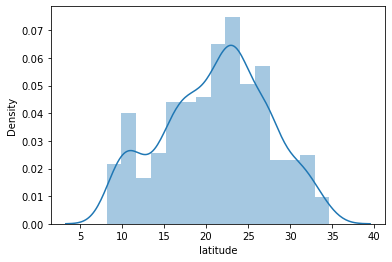

In [85]:
sns.distplot(df["latitude"])

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='longitude', ylabel='Density'>

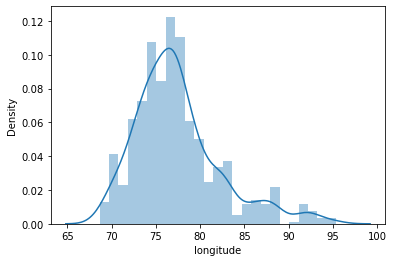

In [86]:
sns.distplot(df["longitude"])

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='commissioning_year', ylabel='Density'>

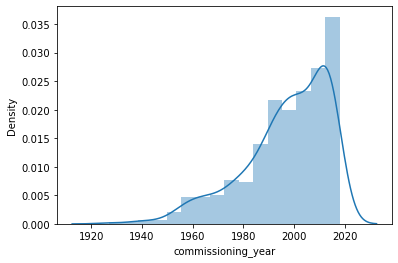

In [87]:
sns.distplot(df["commissioning_year"])

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='generation_gwh_2013', ylabel='Density'>

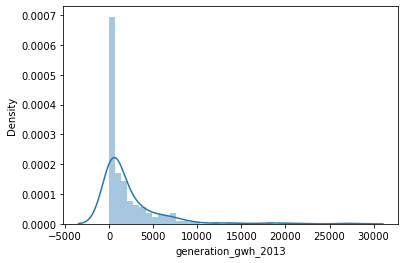

In [88]:
sns.distplot(df["generation_gwh_2013"])

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='generation_gwh_2014', ylabel='Density'>

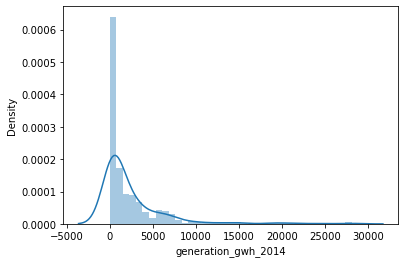

In [89]:
sns.distplot(df["generation_gwh_2014"])

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='generation_gwh_2015', ylabel='Density'>

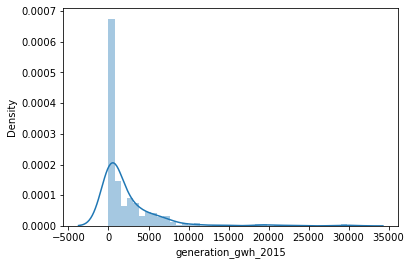

In [90]:
sns.distplot(df["generation_gwh_2015"])

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='generation_gwh_2016', ylabel='Density'>

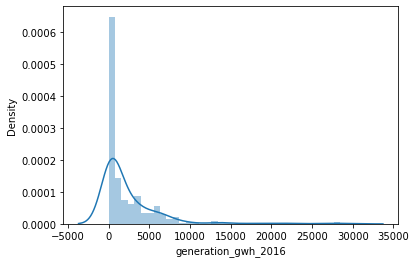

In [91]:
sns.distplot(df["generation_gwh_2016"])

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='generation_gwh_2017', ylabel='Density'>

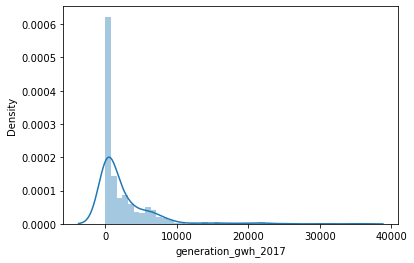

In [92]:
sns.distplot(df["generation_gwh_2017"])

In [93]:
df["generation_gwh_2017"]=df["generation_gwh_2017"].fillna(df["generation_gwh_2017"].median())
df["generation_gwh_2016"]=df["generation_gwh_2016"].fillna(df["generation_gwh_2016"].median())
df["generation_gwh_2015"]=df["generation_gwh_2015"].fillna(df["generation_gwh_2015"].median())
df["generation_gwh_2014"]=df["generation_gwh_2014"].fillna(df["generation_gwh_2014"].median())
df["generation_gwh_2013"]=df["generation_gwh_2013"].fillna(df["generation_gwh_2013"].median())

In [94]:
df["latitude"]=df["latitude"].fillna(df["latitude"].median())
df["longitude"]=df["longitude"].fillna(df["longitude"].median())
df["commissioning_year"]=df["commissioning_year"].fillna(df["commissioning_year"].median())

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 908 non-null    object 
 1   country_long            908 non-null    object 
 2   name                    908 non-null    object 
 3   gppd_idnr               908 non-null    object 
 4   capacity_mw             908 non-null    float64
 5   latitude                908 non-null    float64
 6   longitude               908 non-null    float64
 7   primary_fuel            908 non-null    object 
 8   other_fuel1             908 non-null    object 
 9   commissioning_year      908 non-null    float64
 10  owner                   342 non-null    object 
 11  source                  908 non-null    object 
 12  url                     908 non-null    object 
 13  geolocation_source      908 non-null    object 
 14  year_of_capacity_data   520 non-null    fl

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='year_of_capacity_data', ylabel='Density'>

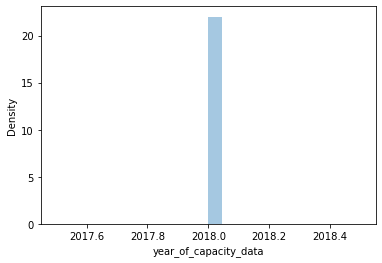

In [96]:
sns.distplot(df["year_of_capacity_data"])

In [97]:
df["year_of_capacity_data"]=df["year_of_capacity_data"].fillna(df["year_of_capacity_data"].mean())
df["owner"]=df["owner"].fillna(df["owner"].mode()[0])


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 908 non-null    object 
 1   country_long            908 non-null    object 
 2   name                    908 non-null    object 
 3   gppd_idnr               908 non-null    object 
 4   capacity_mw             908 non-null    float64
 5   latitude                908 non-null    float64
 6   longitude               908 non-null    float64
 7   primary_fuel            908 non-null    object 
 8   other_fuel1             908 non-null    object 
 9   commissioning_year      908 non-null    float64
 10  owner                   908 non-null    object 
 11  source                  908 non-null    object 
 12  url                     908 non-null    object 
 13  geolocation_source      908 non-null    object 
 14  year_of_capacity_data   908 non-null    fl

All missing values are treated

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='capacity_mw'>

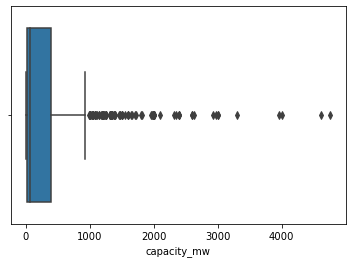

In [99]:
sns.boxplot(df["capacity_mw"])

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='latitude'>

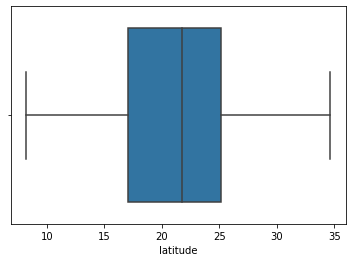

In [100]:
sns.boxplot(df["latitude"])

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='longitude'>

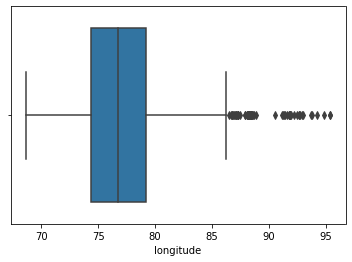

In [101]:
sns.boxplot(df["longitude"])

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='generation_gwh_2013'>

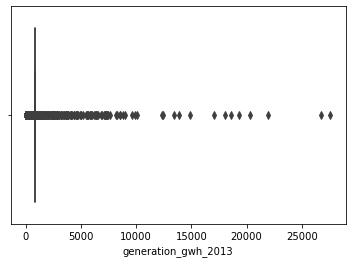

In [102]:
sns.boxplot(df["generation_gwh_2013"])

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='generation_gwh_2014'>

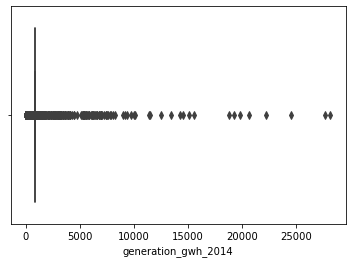

In [103]:
sns.boxplot(df["generation_gwh_2014"])

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='generation_gwh_2015'>

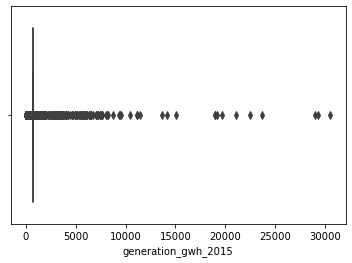

In [104]:
sns.boxplot(df["generation_gwh_2015"])

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='generation_gwh_2016'>

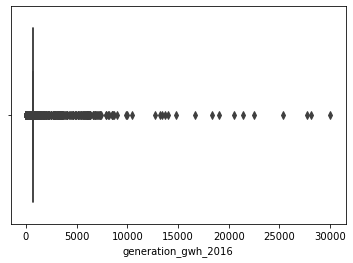

In [105]:
sns.boxplot(df["generation_gwh_2016"])

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='generation_gwh_2017'>

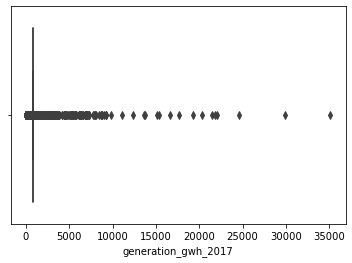

In [106]:
sns.boxplot(df["generation_gwh_2017"])

In [107]:
df.skew()

capacity_mw              3.193257
latitude                -0.161811
longitude                1.150963
commissioning_year      -1.650230
year_of_capacity_data    0.000000
generation_gwh_2013      5.535740
generation_gwh_2014      5.325540
generation_gwh_2015      5.565770
generation_gwh_2016      5.278233
generation_gwh_2017      5.312975
dtype: float64

There are outliers and data is skewed and needs to be treated.

In [108]:
df.shape

(908, 21)

In [114]:
df.corr()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
country,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country_long,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
name,NaN,NaN,1.000000,0.336792,0.059870,-0.133026,0.017599,0.038752,-0.074643,-0.042559,0.098944,-0.013801,0.042711,0.035528,0.079328,0.082761,0.071895,0.065368,0.069395,NaN
gppd_idnr,NaN,NaN,0.336792,1.000000,-0.334308,-0.105275,-0.381087,0.607373,0.001812,0.140865,0.630597,0.416575,0.596994,-0.464119,-0.155146,-0.160279,-0.176156,-0.187756,-0.183912,NaN
capacity_mw,NaN,NaN,0.059870,-0.334308,1.000000,0.047608,0.200473,-0.377783,0.002672,0.215667,-0.310560,-0.241701,-0.243176,0.204698,0.756523,0.804581,0.830400,0.863989,0.877058,NaN
latitude,NaN,NaN,-0.133026,-0.105275,0.047608,1.000000,0.030775,-0.010793,0.036861,0.084220,-0.071185,0.054346,-0.128762,-0.182049,0.053106,0.057527,0.052797,0.046684,0.056430,NaN
longitude,NaN,NaN,0.017599,-0.381087,0.200473,0.030775,1.000000,-0.352749,0.029861,0.035731,-0.300181,-0.236349,-0.305797,0.249233,0.102637,0.107967,0.125723,0.148405,0.156255,NaN
primary_fuel,NaN,NaN,0.038752,0.607373,-0.377783,-0.010793,-0.352749,1.000000,0.004902,-0.065716,0.284055,0.053609,0.589348,-0.482803,-0.228761,-0.240407,-0.249826,-0.260900,-0.263818,NaN
other_fuel1,NaN,NaN,-0.074643,0.001812,0.002672,0.036861,0.029861,0.004902,1.000000,0.041223,0.033643,0.026557,0.028118,-0.021383,0.006463,0.005641,0.008813,0.013677,0.011966,NaN
commissioning_year,NaN,NaN,-0.042559,0.140865,0.215667,0.084220,0.035731,-0.065716,0.041223,1.000000,0.098320,0.085523,0.080849,-0.061057,0.052258,0.086131,0.118738,0.151269,0.164514,NaN


<AxesSubplot:>

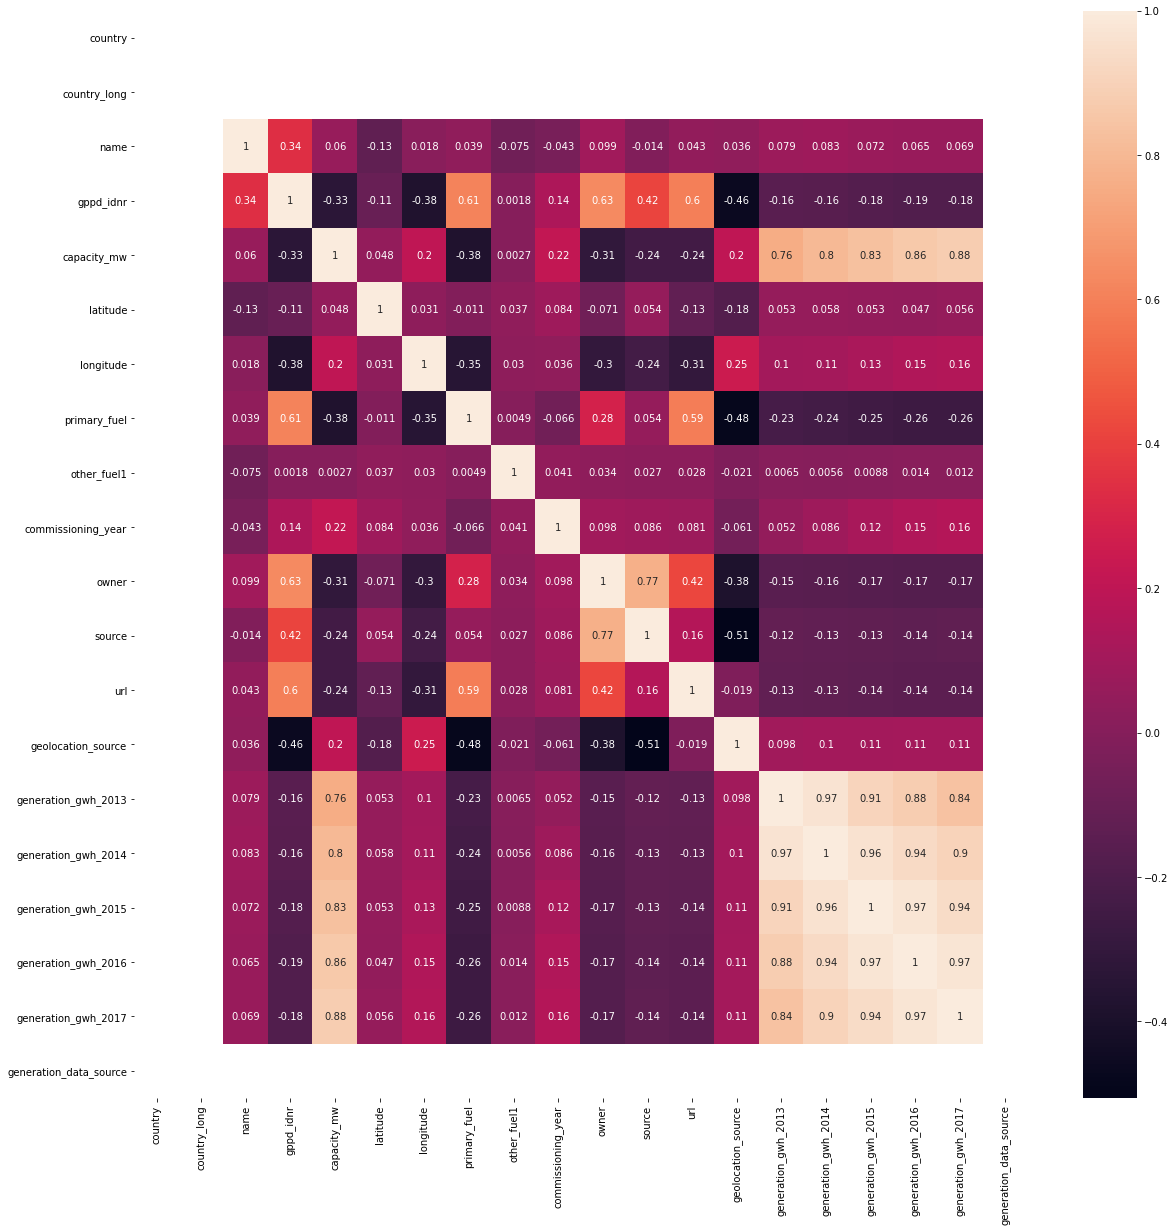

In [113]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)

# Transforming Object from Numeric using encoder

In [111]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))
df

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,...,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
0,0,0,0,658,2.5,28.1839,73.2407,6,2,2011.0,...,109,128,1,2018.0,797.063475,805.760000,701.027250,716.728350,807.601700,0
1,0,0,1,520,98.0,24.7663,74.6090,1,2,2000.0,...,174,173,2,2018.0,797.063475,805.760000,701.027250,716.728350,807.601700,0
2,0,0,2,854,39.2,21.9038,69.3732,7,2,2000.0,...,21,205,2,2018.0,797.063475,805.760000,701.027250,716.728350,807.601700,0
3,0,0,3,0,135.0,23.8712,91.3602,2,2,2004.0,...,22,58,2,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,0
4,0,0,4,1,1800.0,21.9603,82.4091,1,2,2015.0,...,22,58,2,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,0,0,903,494,1600.0,16.2949,77.3568,1,2,2016.0,...,22,58,2,2018.0,797.063475,805.760000,0.994875,233.596650,865.400000,0
904,0,0,904,823,3.0,12.8932,78.1654,6,2,2000.0,...,77,22,0,2018.0,797.063475,805.760000,701.027250,716.728350,807.601700,0
905,0,0,905,892,25.5,15.2758,75.5811,7,2,2000.0,...,21,260,2,2018.0,797.063475,805.760000,701.027250,716.728350,807.601700,0
906,0,0,906,540,80.0,24.3500,73.7477,1,2,2000.0,...,59,82,2,2018.0,797.063475,805.760000,701.027250,716.728350,807.601700,0


<AxesSubplot:>

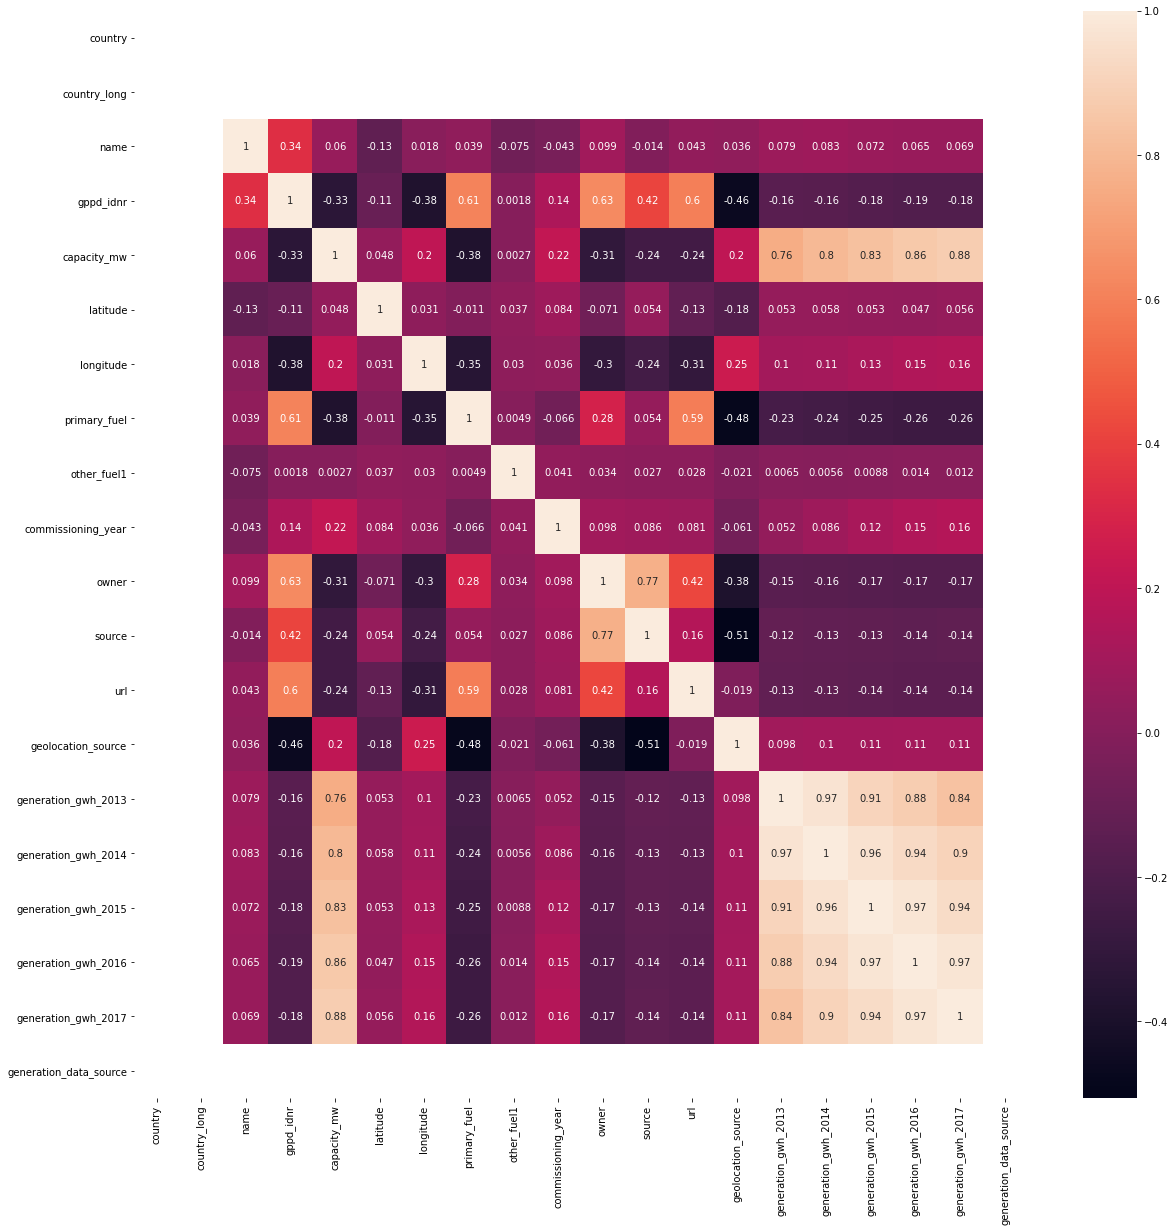

In [115]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)

In [130]:
df1=df.drop(["country","country_long"],axis=1)

In [131]:
df1=df1.drop(["url","owner"],axis=1)

<AxesSubplot:>

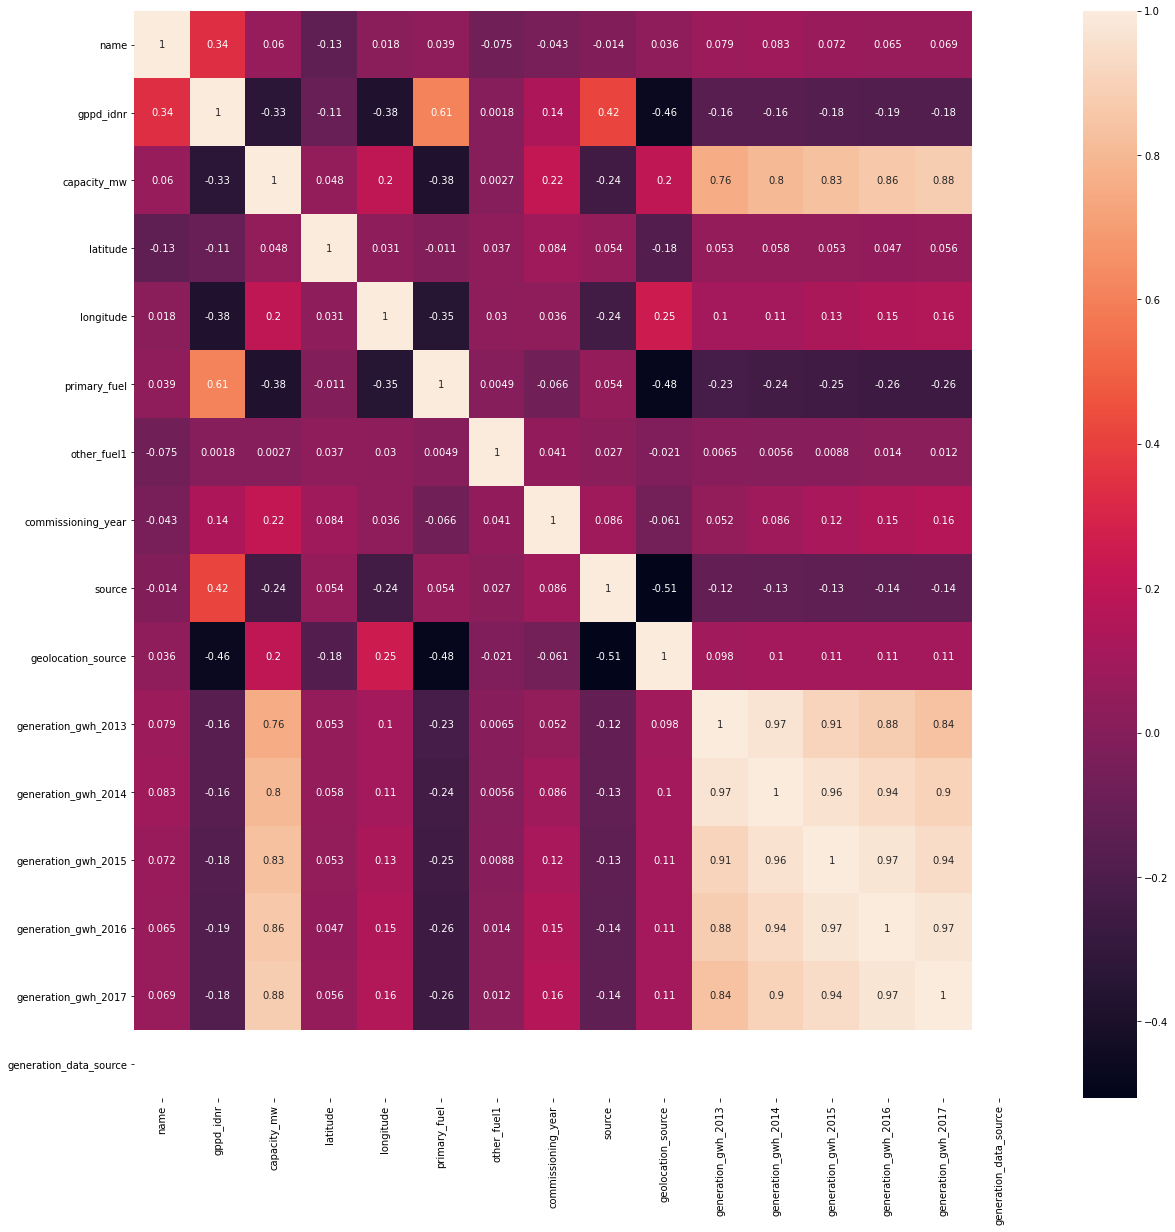

In [118]:
plt.figure(figsize=(20,20))
sns.heatmap(df1.corr(),annot=True)

In [132]:
df1=df1.drop(["primary_fuel","source"],axis=1)

<AxesSubplot:>

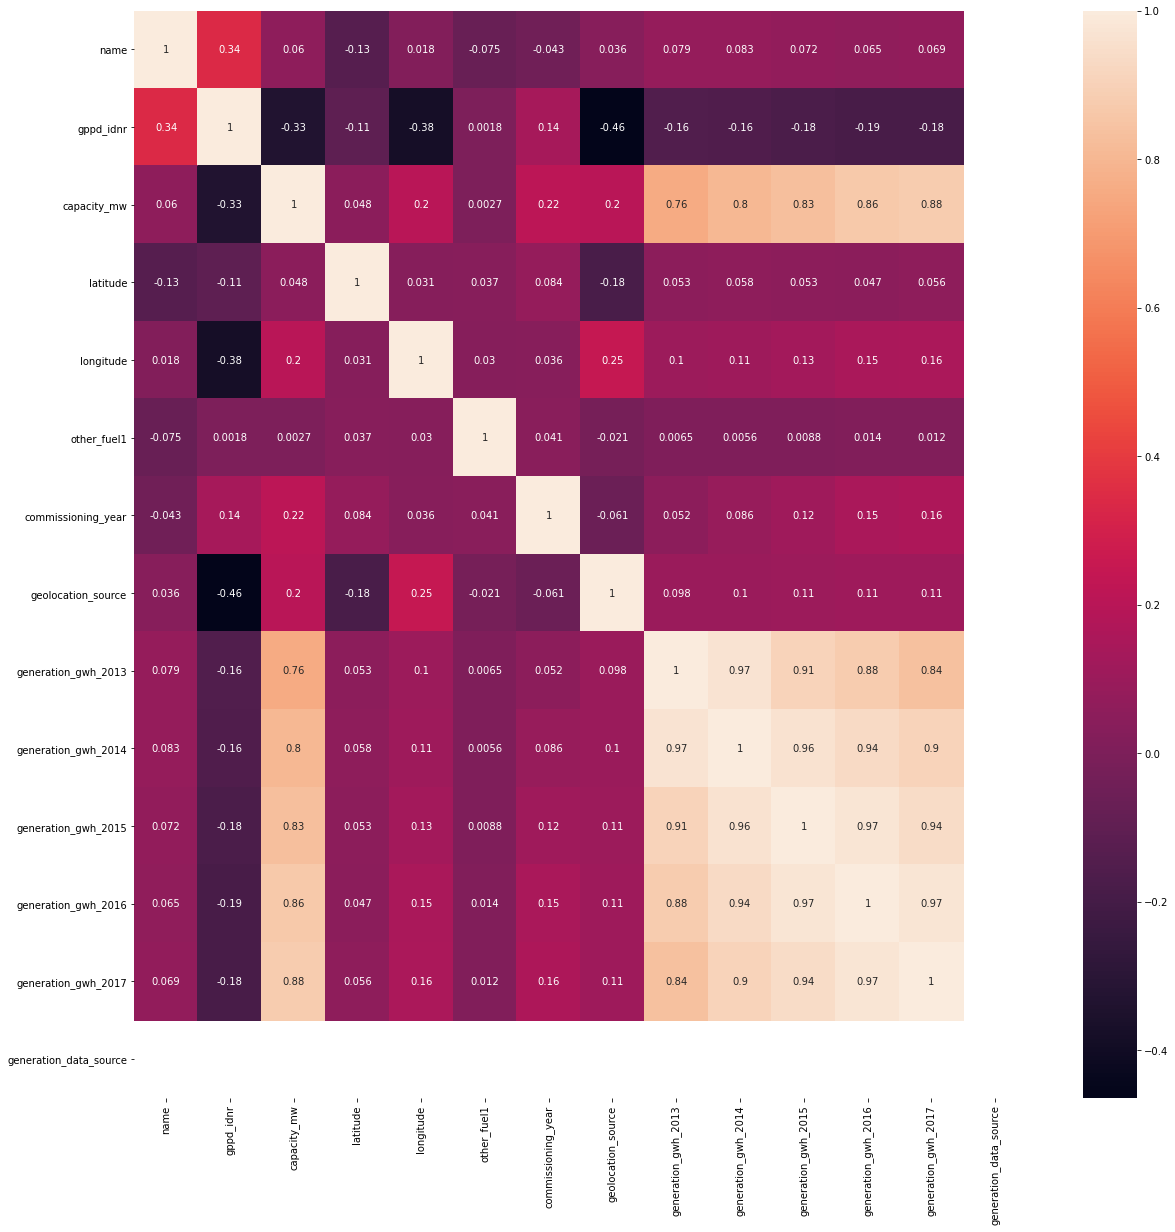

In [138]:
plt.figure(figsize=(20,20))
sns.heatmap(df1.corr(),annot=True)

In [139]:
df1=df1.drop(["generation_data_source"],axis=1)

# Treating Outliers

In [140]:
from scipy.stats import zscore
z=np.abs(zscore(df1))
z.shape

(908, 13)

In [141]:
z1=pd.DataFrame(z)
z1
z1.head(50)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.730144,0.780186,0.549311,1.143298,0.872209,0.054273,0.979918,1.084288,0.247545,0.256321,0.268736,0.278209,0.276171
1,1.726329,0.253704,0.384628,0.581756,0.586027,0.054273,0.138857,0.393991,0.247545,0.256321,0.268736,0.278209,0.276171
2,1.722514,1.527944,0.486024,0.111421,1.681100,0.054273,0.138857,0.393991,0.247545,0.256321,0.268736,0.278209,0.276171
3,1.718699,1.730144,0.320824,0.434683,2.917501,0.054273,0.444698,0.393991,0.311744,0.323889,0.220902,0.221881,0.323391
4,1.714884,1.726329,2.550350,0.120705,1.045370,0.054273,1.285758,0.393991,0.090853,0.545202,1.479248,1.560680,1.226826
5,1.711069,1.722514,0.122514,0.417874,1.833466,0.054273,0.521158,0.393991,0.237937,0.131351,0.098533,0.125462,0.164443
6,1.707254,1.718699,0.450156,1.769768,0.084316,0.054273,2.154943,0.393991,0.499819,0.489325,0.452684,0.496264,0.511889
7,1.703439,1.714884,0.222531,1.807418,0.042653,0.054273,0.903458,0.393991,0.286512,0.303543,0.261930,0.291853,0.318197
8,1.699624,1.711069,0.053537,0.804404,0.318879,0.054273,0.444698,0.393991,0.361059,0.373205,0.455285,0.382926,0.397065
9,1.695808,1.707254,0.191492,0.318516,0.883948,0.054273,0.750538,0.393991,0.469182,0.132668,0.046992,0.071447,0.028016


In [142]:
df1=df[(z<3).all(axis=1)]
df1

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
0,0,0,0,658,2.5,28.1839,73.2407,6,2,2011.0,229,109,128,1,797.063475,805.760000,701.027250,716.728350,807.601700,0
1,0,0,1,520,98.0,24.7663,74.6090,1,2,2000.0,258,174,173,2,797.063475,805.760000,701.027250,716.728350,807.601700,0
2,0,0,2,854,39.2,21.9038,69.3732,7,2,2000.0,2,21,205,2,797.063475,805.760000,701.027250,716.728350,807.601700,0
3,0,0,3,0,135.0,23.8712,91.3602,2,2,2004.0,5,22,58,2,631.777928,617.789264,843.747000,886.004428,663.774500,0
4,0,0,4,1,1800.0,21.9603,82.4091,1,2,2015.0,5,22,58,2,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,0,0,903,494,1600.0,16.2949,77.3568,1,2,2016.0,5,22,58,2,797.063475,805.760000,0.994875,233.596650,865.400000,0
904,0,0,904,823,3.0,12.8932,78.1654,6,2,2000.0,114,77,22,0,797.063475,805.760000,701.027250,716.728350,807.601700,0
905,0,0,905,892,25.5,15.2758,75.5811,7,2,2000.0,5,21,260,2,797.063475,805.760000,701.027250,716.728350,807.601700,0
906,0,0,906,540,80.0,24.3500,73.7477,1,2,2000.0,91,59,82,2,797.063475,805.760000,701.027250,716.728350,807.601700,0


In [143]:
Dataloss=((908-845)/908)*100
Dataloss

6.938325991189427

In [144]:
df2=df1.drop(["capacity_mw"],axis=1)

# splitting DataFrame

In [148]:
x=df2.iloc[:,0:]
y=df1.iloc[:,-16]
y

0         2.5
1        98.0
2        39.2
3       135.0
4      1800.0
        ...  
903    1600.0
904       3.0
905      25.5
906      80.0
907      16.5
Name: capacity_mw, Length: 845, dtype: float64

# Treating Skewness

In [149]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
C:\Users\DELL\anaconda3\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
C:\Users\DELL\anaconda3\lib\site-packages\numpy\core\_methods.py:243: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)


# Scaling Data

In [150]:
from sklearn.preprocessing import StandardScaler
S=StandardScaler()
x=S.fit_transform(x)

# Linear Regression

In [151]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    LR.fit(x_train,y_train)
    pred_train=LR.predict(x_train)
    pred_test=LR.predict(x_test)
    print(f"At random state {i},the training accuracy is:- {r2_score(y_train,pred_train)}")
    print(f"At random state {i},the testing accuracy is:- {r2_score(y_test,pred_test)}")
    print("\n")

At random state 0,the training accuracy is:- 0.6485272106628249
At random state 0,the testing accuracy is:- 0.6052824319585262


At random state 1,the training accuracy is:- 0.6564619230800426
At random state 1,the testing accuracy is:- 0.5557575037738585


At random state 2,the training accuracy is:- 0.6151200162515523
At random state 2,the testing accuracy is:- 0.7308722189406569


At random state 3,the training accuracy is:- 0.6204172891578532
At random state 3,the testing accuracy is:- 0.6798636635859925


At random state 4,the training accuracy is:- 0.651586045915246
At random state 4,the testing accuracy is:- 0.5756281194361175


At random state 5,the training accuracy is:- 0.6568151443392272
At random state 5,the testing accuracy is:- 0.5611708072871415


At random state 6,the training accuracy is:- 0.6306063520795637
At random state 6,the testing accuracy is:- 0.6693167332063066


At random state 7,the training accuracy is:- 0.6200024873866561
At random state 7,the testing accu

At random state 73,the training accuracy is:- 0.6208907548198521
At random state 73,the testing accuracy is:- 0.6992726409379539


At random state 74,the training accuracy is:- 0.6375106309913128
At random state 74,the testing accuracy is:- 0.6389007024924634


At random state 75,the training accuracy is:- 0.6451819844433726
At random state 75,the testing accuracy is:- 0.6203233178511587


At random state 76,the training accuracy is:- 0.6692564335387768
At random state 76,the testing accuracy is:- 0.5221943842882337


At random state 77,the training accuracy is:- 0.6387769470880962
At random state 77,the testing accuracy is:- 0.6301129041305771


At random state 78,the training accuracy is:- 0.6241244590125049
At random state 78,the testing accuracy is:- 0.6705621062441119


At random state 79,the training accuracy is:- 0.6312340505482574
At random state 79,the testing accuracy is:- 0.6743905603124241


At random state 80,the training accuracy is:- 0.6291679831892163
At random state 80

we will use random state =51

In [152]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=51)

In [153]:
LR.fit(x_train,y_train)
pred_test=LR.predict(x_test)
print(r2_score(y_test,pred_test))

0.6396589397773993


In [154]:
Accuracy_Train=r2_score(y_train,pred_train)
Accuracy_Test=r2_score(y_test,pred_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cvscore=cross_val_score(LR,x,y,cv=j)
    cvmean=cvscore.mean()
    print(f"At cross fold {j} the cv score is {cvmean} and accuracy score for training is {Accuracy_Train} and accuracy for the testing is {Accuracy_Test}")
    print("\n")

At cross fold 2 the cv score is 0.5588494025322656 and accuracy score for training is -0.43972449934367774 and accuracy for the testing is 0.6396589397773993


At cross fold 3 the cv score is 0.5978972012517749 and accuracy score for training is -0.43972449934367774 and accuracy for the testing is 0.6396589397773993


At cross fold 4 the cv score is 0.5909149938790274 and accuracy score for training is -0.43972449934367774 and accuracy for the testing is 0.6396589397773993


At cross fold 5 the cv score is 0.6031704074330164 and accuracy score for training is -0.43972449934367774 and accuracy for the testing is 0.6396589397773993


At cross fold 6 the cv score is 0.6018394397360319 and accuracy score for training is -0.43972449934367774 and accuracy for the testing is 0.6396589397773993


At cross fold 7 the cv score is 0.5937069759704229 and accuracy score for training is -0.43972449934367774 and accuracy for the testing is 0.6396589397773993


At cross fold 8 the cv score is 0.603992

we can select CV=8 as its higher than other CV flds

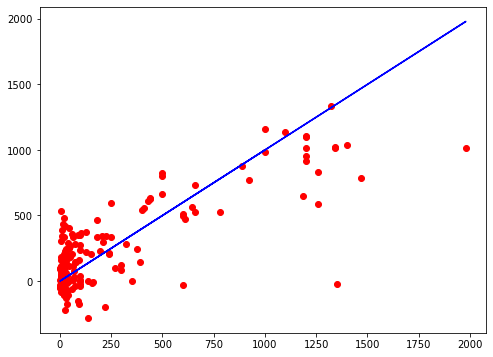

In [155]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=pred_test, color='r')
plt.plot(y_test,y_test, color='b')

# Lasso

In [157]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso

parameters = {'alpha':[.0001, .001, .01, .1, 1, 10],'random_state':[51],'selection':["cyclic","random"],'precompute':[True,False]}
Las= Lasso()
FitParameters= GridSearchCV(Las,parameters)
FitParameters.fit(x_train,y_train)

print(FitParameters.best_params_)

{'alpha': 10, 'precompute': True, 'random_state': 51, 'selection': 'random'}


In [158]:
Las = Lasso(alpha=10,random_state=51,precompute=True,selection="random")
Las.fit(x_train,y_train)
Las.score(x_train,y_train)
pred_lasso = Las.predict(x_test)

Lasso = r2_score(y_test,pred_lasso)
Lasso

0.6401428489927232

In [159]:
cvscore=cross_val_score(Las,x,y,cv=8)
cvmean=cvscore.mean()
cvmean

0.6073296127893291

# Random Forest

In [160]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
parameters = {'criterion':['mse', 'mae'],'max_features':["auto", "sqrt", "log2"],'random_state':[51],'bootstrap':[True,False]}
rf =RandomForestRegressor()
FitParameters = GridSearchCV(rf,parameters)
FitParameters.fit(x_train,y_train)
print(FitParameters.best_params_)

{'bootstrap': False, 'criterion': 'mae', 'max_features': 'sqrt', 'random_state': 51}


In [161]:
rf= RandomForestRegressor(criterion="mae",max_features="sqrt",random_state=51,bootstrap=False)
rf.fit(x_train, y_train)
rf.score(x_train, y_train)
pred_decision = rf.predict(x_test)

rfs = r2_score(y_test,pred_decision)
print('R2 Score:',rfs*100)

rfscore = cross_val_score(rf,x_train,y_train,cv=8)
rfc = rfscore.mean()
print('Cross Val Score:',rfc*100)

R2 Score: 78.0935463534187
Cross Val Score: 79.40493433028004


# Decision Tree

In [162]:
from sklearn.tree import DecisionTreeRegressor

parameters = {'criterion':['mse', 'friedman_mse', 'mae','poisson'], 'splitter':['best', 'random'],'max_features':["auto","sqrt","log2"],'random_state':[51]}
dt =DecisionTreeRegressor()
clf = GridSearchCV(dt,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'criterion': 'mae', 'max_features': 'auto', 'random_state': 51, 'splitter': 'best'}


In [163]:
DTR = DecisionTreeRegressor(criterion='mae', splitter='best',random_state=51,max_features='auto')
DTR.fit(x_train,y_train)
DTR.score(x_train,y_train)
pred_decision = DTR.predict(x_test)

dts = r2_score(y_test,pred_decision)
print('R2 Score:',dts*100)

dtscore = cross_val_score(DTR,x_train,y_train,cv=8)
dtc = dtscore.mean() 
print('Cross Val Score:',dtc*100)

R2 Score: 53.28699244822588
Cross Val Score: 62.65083558754905


# SVR

In [164]:
from sklearn.svm import LinearSVR
parameters = {'loss':['epsilon_insensitive', 'squared_epsilon_insensitive'], 'random_state':[51],'fit_intercept':[True,False]}
SVR =LinearSVR()
clf = GridSearchCV(SVR,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'fit_intercept': True, 'loss': 'squared_epsilon_insensitive', 'random_state': 51}


In [165]:
SVR = LinearSVR(fit_intercept=True, loss='squared_epsilon_insensitive',random_state=51)
SVR.fit(x_train,y_train)
SVR.score(x_train,y_train)
pred_decision = SVR.predict(x_test)

SVRs = r2_score(y_test,pred_decision)
print('R2 Score:',SVRs*100)

SVRscore = cross_val_score(SVR,x_train,y_train,cv=8)
SVRc = SVRscore.mean() 
print('Cross Val Score:',SVRc*100)

R2 Score: 63.970808110316455
Cross Val Score: 60.603821826918555


From above we could see that Random Forest is the best fit

In [166]:
import pickle
filename = 'BB.pkl'
pickle.dump(rf, open(filename, 'wb'))

In [167]:
import numpy as np
a=np.array(y_test)
a

array([1.00000e+03, 3.00000e+02, 6.40000e+01, 1.01000e+02, 1.32000e+01,
       2.40000e+02, 1.20000e+03, 1.26000e+03, 1.89000e+01, 6.10000e+02,
       6.30000e+01, 4.12020e+02, 0.00000e+00, 1.32000e+03, 1.80000e+01,
       2.50000e+01, 1.00000e+01, 4.20000e+01, 9.18000e+01, 5.07000e+01,
       1.34000e+03, 3.90000e+01, 4.27500e+02, 1.56100e+02, 5.00000e+02,
       2.80000e+01, 5.00000e+00, 1.35000e+03, 1.00000e+01, 3.00000e+01,
       3.00000e+01, 2.07000e+02, 3.46500e+01, 1.02500e+01, 6.60000e+00,
       1.65000e+01, 1.80000e+02, 1.20000e+03, 1.25000e+02, 3.00000e+00,
       1.18800e+03, 2.00000e+00, 4.60000e+01, 1.00000e+02, 2.55000e+01,
       1.50000e+01, 1.20000e+03, 4.30000e+01, 2.10000e+01, 2.00000e+01,
       3.00000e+00, 8.00000e+01, 3.00000e+01, 1.05000e+01, 4.25000e+01,
       2.50000e+01, 2.00000e+01, 3.00000e+01, 3.74571e+02, 2.40000e+01,
       1.20000e+03, 2.00000e+01, 3.00000e+02, 1.10000e+03, 3.50000e+02,
       5.80000e+00, 6.00000e+02, 5.00000e+02, 3.60000e+01, 1.260

In [168]:
predicted=np.array(rf.predict(x_test))
predicted

array([1136.9698 ,  332.25474,  115.067  ,  150.4044 ,   17.522  ,
        247.5666 , 1220.9578 ,  950.16   ,   19.0713 ,  447.84828,
        158.1349 ,  855.692  ,   21.722  , 1472.6956 ,   30.861  ,
         41.2964 ,   18.781  ,  179.5853 ,   29.352  ,   63.8715 ,
       1243.9    ,   20.365  ,  540.2079 ,  372.5975 ,  602.807  ,
         68.615  ,    9.1645 ,  299.397  ,   14.3    ,   45.531  ,
         42.3465 ,  381.77884,   22.2385 ,   26.3635 ,   14.263  ,
         15.5555 ,  261.6872 ,  931.1508 ,  320.7546 ,   16.92   ,
        592.402  ,   66.097  ,   78.224  ,   29.8325 ,   22.2734 ,
         12.5606 , 1368.675  ,  471.46634,   21.9208 ,   21.451  ,
         31.9782 ,   64.0878 ,   57.649  ,   11.5995 ,   52.5865 ,
         62.876  ,  112.558  ,   50.729  ,  563.0008 ,   15.132  ,
       1302.099  ,   18.4036 ,   34.982  , 1429.2    ,  270.2483 ,
         31.379  ,  729.7344 ,  645.86548,   64.4335 ,  180.0548 ,
         32.67   ,   53.0005 ,   25.162  ,  699.5973 ,  306.19

In [169]:
conclusion=pd.DataFrame({"original":a,"predicted":predicted}, index= range(len(a)))
conclusion

,original,predicted
0,1000.0,1136.96980
1,300.0,332.25474
2,64.0,115.06700
3,101.0,150.40440
4,13.2,17.52200
...,...,...
164,1470.0,1219.62000
165,600.0,139.41440
166,1000.0,1514.58720
167,660.0,460.72100


# Predict Primary Fuel

In [170]:
df3=df1.drop(["primary_fuel"],axis=1)

In [172]:
x=df3.iloc[:,0:]
y=df1.iloc[:,-13]
x

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,other_fuel1,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
0,0,0,0,658,2.5,28.1839,73.2407,2,2011.0,229,109,128,1,797.063475,805.760000,701.027250,716.728350,807.601700,0
1,0,0,1,520,98.0,24.7663,74.6090,2,2000.0,258,174,173,2,797.063475,805.760000,701.027250,716.728350,807.601700,0
2,0,0,2,854,39.2,21.9038,69.3732,2,2000.0,2,21,205,2,797.063475,805.760000,701.027250,716.728350,807.601700,0
3,0,0,3,0,135.0,23.8712,91.3602,2,2004.0,5,22,58,2,631.777928,617.789264,843.747000,886.004428,663.774500,0
4,0,0,4,1,1800.0,21.9603,82.4091,2,2015.0,5,22,58,2,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,0,0,903,494,1600.0,16.2949,77.3568,2,2016.0,5,22,58,2,797.063475,805.760000,0.994875,233.596650,865.400000,0
904,0,0,904,823,3.0,12.8932,78.1654,2,2000.0,114,77,22,0,797.063475,805.760000,701.027250,716.728350,807.601700,0
905,0,0,905,892,25.5,15.2758,75.5811,2,2000.0,5,21,260,2,797.063475,805.760000,701.027250,716.728350,807.601700,0
906,0,0,906,540,80.0,24.3500,73.7477,2,2000.0,91,59,82,2,797.063475,805.760000,701.027250,716.728350,807.601700,0


In [173]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
C:\Users\DELL\anaconda3\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
C:\Users\DELL\anaconda3\lib\site-packages\numpy\core\_methods.py:243: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)


In [174]:
from sklearn.preprocessing import StandardScaler
S=StandardScaler()
x=S.fit_transform(x)

In [175]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
from sklearn.metrics import accuracy_score

In [176]:
l=[]
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("At random state:",i)
        print("Traning score is :-",accuracy_score(y_train,pred_train)*100)
        print("Test score is :-",accuracy_score(y_test,pred_test)*100)
        l.append(i)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

At random state: 40
Traning score is :- 78.69822485207101
Test score is :- 78.69822485207101


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

Random state is 40

In [177]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=40,test_size=0.20)


In [178]:
lr_predict=lr.predict(x_test)
from sklearn.model_selection import cross_val_score
lss=accuracy_score(y_test,lr_predict)
for j in range(2,10):
    lssscore=cross_val_score(lr,x,y,cv=j)
    lsc=lssscore.mean()
    print("cv:",j)
    print("cross validation score is",lsc*100)
    print("Accuracy_score :",lss*100)

cv: 2
cross validation score is 73.49248764747404
Accuracy_score : 80.4733727810651
cv: 3
cross validation score is 77.39582544610181
Accuracy_score : 80.4733727810651
cv: 4
cross validation score is 77.63346150406868
Accuracy_score : 80.4733727810651


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

cv: 5
cross validation score is 77.63313609467455
Accuracy_score : 80.4733727810651


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


cv: 6
cross validation score is 77.75075987841944
Accuracy_score : 80.4733727810651


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

cv: 7
cross validation score is 77.87091696182607
Accuracy_score : 80.4733727810651


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

cv: 8
cross validation score is 77.87174303683737
Accuracy_score : 80.4733727810651


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

cv: 9
cross validation score is 78.34718726963065
Accuracy_score : 80.4733727810651


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


CV=9 can be used

# Random Forest Classifier

In [180]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score

parameters = {'criterion':['gini', 'entropy'],'max_features':["auto", "sqrt", "log2"],'class_weight':["balanced","balanced_subsample"],'random_state':[40]}
rf =RandomForestClassifier()
FitParameters = GridSearchCV(rf,parameters)
FitParameters.fit(x_train,y_train)

print(FitParameters.best_params_)

{'class_weight': 'balanced', 'criterion': 'gini', 'max_features': 'auto', 'random_state': 2}


In [192]:
rf= RandomForestClassifier(criterion="gini",max_features="auto",class_weight="balanced",random_state=40)
rf.fit(x_train, y_train)
rf.score(x_train, y_train)
pred_decision = rf.predict(x_test)

#rfs = r2_score(y_test,pred_decision)
#print('R2 Score:',rfs*100)

#rfscore = cross_val_score(rf,x_train,y_train,cv=9)

#rfc = rfscore.mean()
#x_predict = rf.predict(x_test)
print(classification_report(pred_decision,y_test))
#print('Cross Val Score:',rfc*100)

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        14
           1       0.90      0.76      0.82        49
           2       0.24      0.67      0.35         6
           3       0.93      0.84      0.89        51
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         3
           6       1.00      1.00      1.00        23
           7       1.00      1.00      1.00        23

    accuracy                           0.84       169
   macro avg       0.62      0.64      0.61       169
weighted avg       0.90      0.84      0.86       169



C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Decision Tree Classifier

In [184]:
from sklearn.tree import DecisionTreeClassifier
parameters = {'criterion':['gini', 'entropy'],'max_features':["auto", "sqrt", "log2"],'splitter':["best", "random"],'random_state':[40]}
DTC =DecisionTreeClassifier()
FitParameters = GridSearchCV(DTC,parameters)
FitParameters.fit(x_train,y_train)
print(FitParameters.best_params_)

{'criterion': 'gini', 'max_features': 'auto', 'random_state': 40, 'splitter': 'best'}


In [187]:
from sklearn.metrics import classification_report
DTC1= DecisionTreeClassifier(criterion="gini",max_features="auto",random_state=40,splitter="best")
DTC1.fit(x_train, y_train)
DTC1.score(x_train, y_train)
x_predict = DTC1.predict(x_test)
print(classification_report(x_predict,y_test))


              precision    recall  f1-score   support

           0       0.64      0.75      0.69        12
           1       0.73      0.57      0.64        53
           2       0.41      0.39      0.40        18
           3       0.67      0.86      0.76        36
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         3
           6       0.96      1.00      0.98        22
           7       1.00      0.96      0.98        24

    accuracy                           0.72       169
   macro avg       0.55      0.57      0.56       169
weighted avg       0.73      0.72      0.72       169



# SVC

In [190]:
from sklearn import svm
parameters = {'gamma':['scale','auto'],'random_state':[40],'shrinking':[True,False]}
SVC=svm.SVC()
FitParameters = GridSearchCV(SVC,parameters)
FitParameters.fit(x_train,y_train)
print(FitParameters.best_params_)

{'gamma': 'scale', 'random_state': 40, 'shrinking': True}


In [191]:
svc= svm.SVC(gamma="scale",random_state=40,shrinking=True)
svc.fit(x_train, y_train)
svc.score(x_train, y_train)
x_predict = svc.predict(x_test)
print(classification_report(x_predict,y_test))

              precision    recall  f1-score   support

           0       0.93      0.68      0.79        19
           1       0.83      0.68      0.75        50
           2       0.00      0.00      0.00         1
           3       0.93      0.81      0.87        53
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.96      1.00      0.98        22
           7       1.00      0.96      0.98        24

    accuracy                           0.80       169
   macro avg       0.58      0.52      0.55       169
weighted avg       0.91      0.80      0.85       169



C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


From the above Random Forest is the best algorithm

In [193]:
import pickle
filename = 'Tit.pkl'
pickle.dump(rf, open(filename, 'wb'))

In [194]:
import numpy as np
a=np.array(y_test)
a

array([6, 1, 6, 3, 2, 1, 3, 6, 6, 6, 1, 2, 3, 7, 1, 3, 2, 7, 1, 1, 3, 3,
       2, 1, 7, 1, 3, 2, 1, 6, 7, 3, 0, 0, 1, 1, 7, 6, 1, 7, 1, 3, 1, 6,
       6, 3, 7, 2, 7, 3, 7, 2, 0, 1, 7, 2, 2, 6, 1, 1, 2, 0, 5, 2, 1, 2,
       2, 3, 0, 1, 3, 3, 6, 6, 1, 1, 6, 3, 3, 7, 1, 1, 1, 3, 3, 3, 3, 3,
       1, 5, 1, 0, 3, 1, 7, 2, 6, 3, 6, 7, 6, 2, 3, 6, 3, 0, 0, 0, 7, 3,
       3, 1, 1, 0, 3, 6, 7, 3, 1, 3, 1, 7, 1, 0, 1, 3, 6, 1, 3, 7, 0, 3,
       3, 0, 2, 1, 7, 6, 4, 3, 6, 1, 1, 1, 3, 6, 3, 7, 0, 7, 4, 6, 7, 3,
       3, 4, 1, 1, 3, 3, 3, 2, 7, 7, 3, 3, 3, 1, 3])

In [195]:
predicted=np.array(rf.predict(x_test))
predicted
predicted.shape
rf.predict(x_test)

array([6, 1, 6, 3, 5, 0, 3, 6, 6, 6, 1, 2, 3, 7, 1, 3, 3, 7, 1, 1, 3, 3,
       1, 1, 7, 1, 3, 1, 1, 6, 7, 3, 2, 0, 1, 1, 7, 6, 1, 7, 1, 1, 1, 6,
       6, 3, 7, 2, 7, 3, 7, 1, 0, 1, 7, 1, 5, 6, 1, 1, 3, 0, 3, 1, 1, 3,
       5, 3, 0, 1, 3, 3, 6, 6, 1, 1, 6, 3, 3, 7, 1, 3, 1, 3, 3, 3, 1, 3,
       1, 3, 0, 0, 3, 1, 7, 2, 6, 3, 6, 7, 6, 1, 3, 6, 3, 1, 0, 0, 7, 3,
       3, 1, 1, 0, 3, 6, 7, 3, 1, 3, 1, 7, 1, 0, 1, 3, 6, 2, 1, 7, 0, 3,
       3, 0, 2, 1, 7, 6, 1, 3, 6, 1, 1, 1, 3, 6, 3, 7, 0, 7, 3, 6, 7, 3,
       3, 3, 1, 1, 3, 3, 3, 1, 7, 7, 3, 3, 3, 1, 3])

In [196]:
conclusion=pd.DataFrame({"original":a,"predicted":predicted}, index= range(len(a)))
conclusion

,original,predicted
0,6,6
1,1,1
2,6,6
3,3,3
4,2,5
...,...,...
164,3,3
165,3,3
166,3,3
167,1,1
